In [52]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
%pylab inline
import seaborn as sns
figsize(12, 8)

Populating the interactive namespace from numpy and matplotlib


## Первое задание

In [53]:
train_df = pd.read_csv("C:/Users/MsSurgeon/Documents/BeelineGit/data/titanic_train.csv")

In [54]:
y = train_df['Survived']

In [55]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [56]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Pclass'], prefix="PClass"),
                      pd.get_dummies(train_df['Sex'], prefix="Sex"),
                      pd.get_dummies(train_df['SibSp'], prefix="SibSp"),
                      pd.get_dummies(train_df['Parch'], prefix="Parch"),
                     pd.get_dummies(train_df['Embarked'], prefix="Embarked")],
                     axis=1)

In [57]:
train_df.drop(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 
               'Parch', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis=1, inplace=True)

In [58]:
train_df.head()

,Age,Fare,PClass_1,PClass_2,PClass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,38.0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,26.0,7.9250,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,35.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,35.0,8.0500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(train_df,y)

clf = RandomForestClassifier(random_state=42, n_estimators = 10, max_depth=5, min_samples_leaf=2)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test) # порог 0.5
y_pred_proba = clf.predict_proba(X_test)[:,1]

print (accuracy_score(y_test,y_pred))

0.829596412556


In [60]:
df = pd.DataFrame({u'Вероятность погибнуть':y_pred_proba,u'Погиб':y_test})
df.sort_values(u'Вероятность погибнуть',ascending=False,inplace=True)
df.head(11).T

,88,556,496,1,366,856,765,829,615,504,290
Вероятность погибнуть,0.972639,0.972297,0.972297,0.972297,0.972297,0.945675,0.943634,0.940066,0.937862,0.935238,0.935238
Погиб,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
df[u'Кол-во пасажиров'] = 1
df[u'Кол-во пасажиров накоп. %'] = 100 * df[u'Кол-во пасажиров'].cumsum() / df[u'Кол-во пасажиров'].sum()
dfm = df
df.head(11).T

,88,556,496,1,366,856,765,829,615,504,290
Вероятность погибнуть,0.972639,0.972297,0.972297,0.972297,0.972297,0.945675,0.943634,0.940066,0.937862,0.935238,0.935238
Погиб,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Кол-во пасажиров,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Кол-во пасажиров накоп. %,0.448430,0.896861,1.345291,1.793722,2.242152,2.690583,3.139013,3.587444,4.035874,4.484305,4.932735


In [62]:
decile = pd.cut(df[u'Кол-во пасажиров накоп. %'],
 np.arange(0,1.1,0.1)*100,
 labels=np.arange(0.1,1.1,0.1)*100)

df = df.groupby(decile)[u'Погиб'].sum().reset_index()
df = pd.DataFrame(np.concatenate([[[0,0]],df.values,]),columns=df.columns)
df

,Кол-во пасажиров накоп. %,Погиб
0,0,0
1,10,21
2,20,20
3,30,11
4,40,10
5,50,6
6,60,4
7,70,2
8,80,2
9,90,1


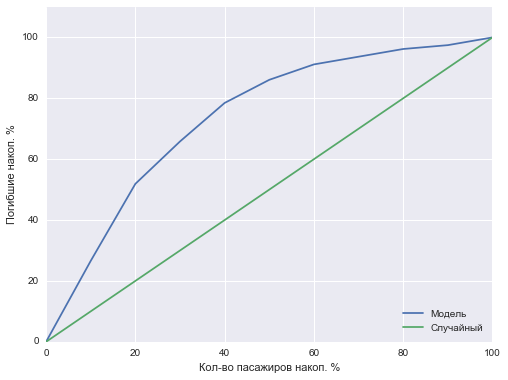

In [63]:
df[u'Погибшие накоп. %'] = 100 * df[u'Погиб'].cumsum()/df[u'Погиб'].sum()
df[u'Кол-во пасажиров накоп. %'] = df[u'Кол-во пасажиров накоп. %'].astype('float64')
df.plot(u'Кол-во пасажиров накоп. %',
        u'Погибшие накоп. %',
        xlim=[0,100],ylim=[0,110],
       label=u'Модель',figsize=(8, 6))

plt.plot(df[u'Кол-во пасажиров накоп. %'],
         df[u'Кол-во пасажиров накоп. %'],
        label=u'Случайный')
plt.legend(loc='lower right')
plt.ylabel(u'Погибшие накоп. %')

In [64]:
df = df.loc[1:]
df['lift'] = df[u'Погибшие накоп. %']/(df[u'Кол-во пасажиров накоп. %'])
df

,Кол-во пасажиров накоп. %,Погиб,Погибшие накоп. %,lift
1,10.0,21,26.5823,2.65823
2,20.0,20,51.8987,2.59494
3,30.0,11,65.8228,2.19409
4,40.0,10,78.481,1.96203
5,50.0,6,86.0759,1.72152
6,60.0,4,91.1392,1.51899
7,70.0,2,93.6709,1.33816
8,80.0,2,96.2025,1.20253
9,90.0,1,97.4684,1.08298
10,100.0,2,100,1


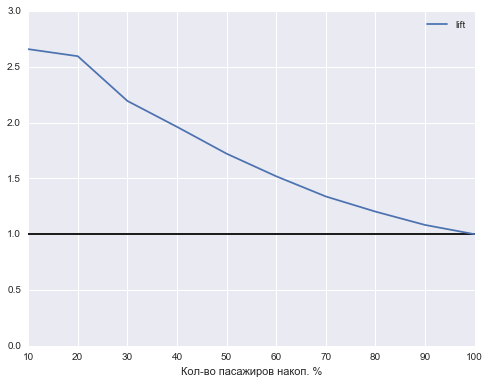

In [65]:
df.plot(u'Кол-во пасажиров накоп. %','lift',ylim=[0,3],figsize=(8, 6))
plt.hlines(1,0,100)

In [66]:
df.lift.mean()

1.7273457906369294

In [67]:
df[df[u'Кол-во пасажиров накоп. %'] == 50]

,Кол-во пасажиров накоп. %,Погиб,Погибшие накоп. %,lift
5,50.0,6,86.0759,1.72152


## Второе задание

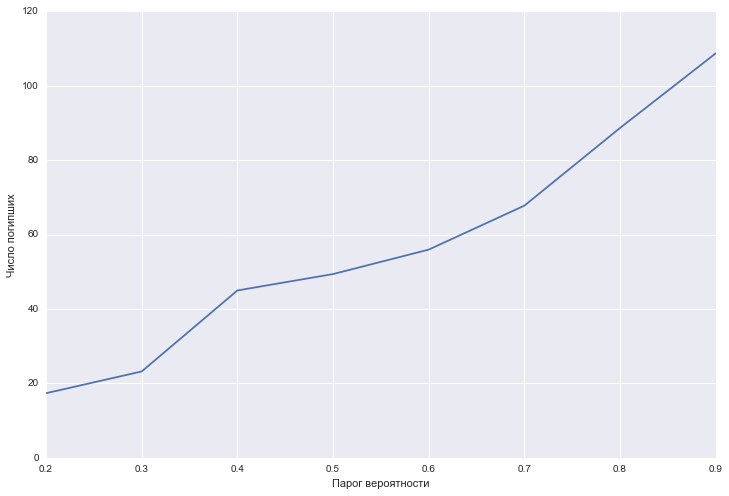

In [273]:
threshold = np.empty((0,2))
for X in np.arange(0,1,0.1):
    setX = dfm[dfm[u'Вероятность погибнуть'] <= X][u'Вероятность погибнуть']
    if not setX.empty: 
        threshold = append(threshold,\
                        [[(((setX/setX.sum())*dfm[u'Погиб']).sum())*dfm[u'Кол-во пасажиров'].sum(),X]],axis=0)
plt.plot(threshold[:,1],
         threshold[:,0])

plt.xlabel(u'Парог вероятности')
plt.ylabel(u'Число погипших')

## Третье задание

In [106]:
dfm[u'Потенциальный доход'] = 10000

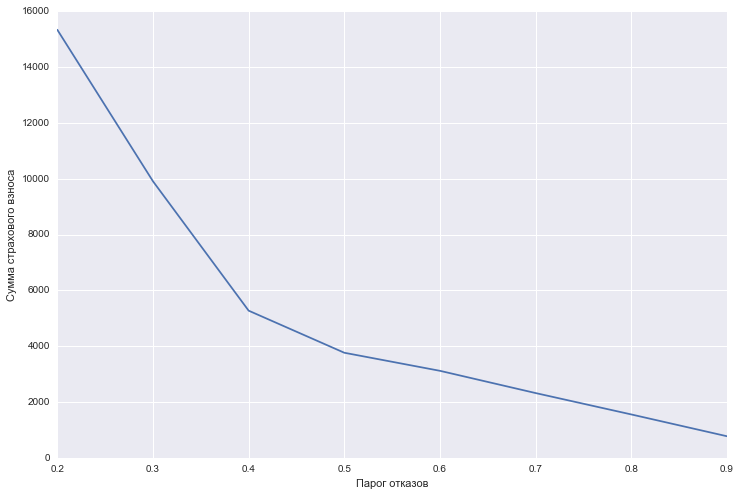

In [239]:
insurance = np.empty((0,2))
for X in np.arange(0,1,0.1):
    X_person = dfm[dfm[u'Вероятность погибнуть'] >= X]
    Y_person = dfm[dfm[u'Вероятность погибнуть'] < X]
    if not X_person.empty and not Y_person.empty: 
        insurance = append(insurance,\
                        [[X_person[u'Потенциальный доход'].sum()/Y_person[u'Кол-во пасажиров'].sum(),X]],axis=0)

plt.plot(insurance[:,1],
         insurance[:,0])

plt.xlabel(u'Парог отказов')
plt.ylabel(u'Cумма страхового взноса')